TensorFlow and Keras: Build various MLP architectures for MNIST dataset 

In [ ]:
# if you keras is not using tensorflow as backend set "KERAS_BACKEND=tensorflow" use this command
from keras.utils import np_utils 
from keras.datasets import mnist 
import seaborn as sns
from keras.initializers import RandomNormal

Using TensorFlow backend.


In [ ]:
# if you keras is not using tensorflow as backend set "KERAS_BACKEND=tensorflow" use this command
from keras.utils import np_utils 
from keras.datasets import mnist 
import seaborn as sns
from keras.initializers import RandomNormal


In [ ]:
# the data, shuffled and split between train and test sets 
(X_train, y_train), (X_test, y_test) = mnist.load_data()

11493376/11490434 [==============================] - 1s 0us/step


In [ ]:
print("Number of training examples :", X_train.shape[0], "and each image is of shape (%d, %d)"%(X_train.shape[1], X_train.shape[2]))
print("Number of training examples :", X_test.shape[0], "and each image is of shape (%d, %d)"%(X_test.shape[1], X_test.shape[2]))

Number of training examples : 60000 and each image is of shape (28, 28)
Number of training examples : 10000 and each image is of shape (28, 28)


In [ ]:
# if you observe the input shape its 2 dimensional vector
# for each image we have a (28*28) vector
# we will convert the (28*28) vector into single dimensional vector of 1 * 784 

X_train = X_train.reshape(X_train.shape[0], X_train.shape[1]*X_train.shape[2]) 
X_test = X_test.reshape(X_test.shape[0], X_test.shape[1]*X_test.shape[2]) 

In [ ]:
# after converting the input images from 3d to 2d vectors

print("Number of training examples :", X_train.shape[0], "and each image is of shape (%d)"%(X_train.shape[1]))
print("Number of training examples :", X_test.shape[0], "and each image is of shape (%d)"%(X_test.shape[1]))

Number of training examples : 60000 and each image is of shape (784)
Number of training examples : 10000 and each image is of shape (784)


In [ ]:
# if we observe the above matrix each cell is having a value between 0-255
# before we move to apply machine learning algorithms lets try to normalize the data
# X => (X - Xmin)/(Xmax-Xmin) = X/255

X_train = X_train/255
X_test = X_test/255

In [ ]:
# here we are having a class number for each image
print("Class label of first image :", y_train[0])

# lets convert this into a 10 dimensional vector
# ex: consider an image is 5 convert it into 5 => [0, 0, 0, 0, 0, 1, 0, 0, 0, 0]
# this conversion needed for MLPs 

Y_train = np_utils.to_categorical(y_train, 10) 
Y_test = np_utils.to_categorical(y_test, 10)

print("After converting the output into a vector : ",Y_train[0])

Class label of first image : 5
After converting the output into a vector :  [0. 0. 0. 0. 0. 1. 0. 0. 0. 0.]


In [ ]:
from keras.models import Sequential 
from keras.layers import Dense, Activation 

In [ ]:
# some model parameters

output_dim = 10
input_dim = X_train.shape[1]

batch_size = 128 
nb_epoch = 20

### Model1 Input(784)-ReLu(256)-ReLu(64)-Softmax(output)

In [ ]:
# start building a model
from keras.layers.normalization import BatchNormalization
from keras.layers import Dropout
import warnings
warnings.filterwarnings('ignore')
model_relu = Sequential()
model_relu.add(Dense(256, activation='relu', input_shape=(input_dim,), kernel_initializer=RandomNormal(mean=0.0, stddev=0.062, seed=None)))
model_relu.add(BatchNormalization())
model_relu.add(Dropout(0.5))
model_relu.add(Dense(64, activation='relu', kernel_initializer=RandomNormal(mean=0.0, stddev=0.125, seed=None)) )
model_relu.add(BatchNormalization())
model_relu.add(Dropout(0.5))
model_relu.add(Dense(output_dim, activation='softmax'))

model_relu.summary()

Model: "sequential_2"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_4 (Dense)              (None, 256)               200960    
_________________________________________________________________
batch_normalization_3 (Batch (None, 256)               1024      
_________________________________________________________________
dropout_3 (Dropout)          (None, 256)               0         
_________________________________________________________________
dense_5 (Dense)              (None, 64)                16448     
_________________________________________________________________
batch_normalization_4 (Batch (None, 64)                256       
_________________________________________________________________
dropout_4 (Dropout)          (None, 64)                0         
_________________________________________________________________
dense_6 (Dense)              (None, 10)               

In [ ]:
model_relu.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

history = model_relu.fit(X_train, Y_train, batch_size=batch_size, epochs=nb_epoch, verbose=1, validation_data=(X_test, Y_test))


Instructions for updating:
Use tf.where in 2.0, which has the same broadcast rule as np.where
Train on 60000 samples, validate on 10000 samples
Epoch 1/20
60000/60000 [==============================] - 6s 103us/step - loss: 0.6308 - acc: 0.8038 - val_loss: 0.2087 - val_acc: 0.9355
Epoch 2/20
60000/60000 [==============================] - 5s 83us/step - loss: 0.3054 - acc: 0.9093 - val_loss: 0.1450 - val_acc: 0.9566
Epoch 3/20
60000/60000 [==============================] - 5s 77us/step - loss: 0.2388 - acc: 0.9307 - val_loss: 0.1201 - val_acc: 0.9644
Epoch 4/20
60000/60000 [==============================] - 5s 78us/step - loss: 0.2039 - acc: 0.9406 - val_loss: 0.1044 - val_acc: 0.9688
Epoch 5/20
60000/60000 [==============================] - 5s 79us/step - loss: 0.1804 - acc: 0.9472 - val_loss: 0.0961 - val_acc: 0.9709
Epoch 6/20
60000/60000 [==============================] - 5s 80us/step - loss: 0.1615 - acc: 0.9532 - val_loss: 0.0909 - val_acc: 0.9729
Epoch 7/20
60000/60000 [========

Test score: 0.06805458867215784
Test accuracy: 0.9821


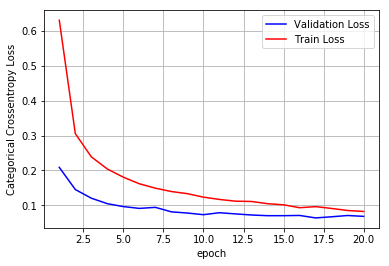

In [ ]:
import matplotlib.pyplot as plt
import numpy as np
import time
# https://gist.github.com/greydanus/f6eee59eaf1d90fcb3b534a25362cea4
# https://stackoverflow.com/a/14434334
# this function is used to update the plots for each epoch and error
def plt_dynamic(x, vy, ty, ax, colors=['b']):
    ax.plot(x, vy, 'b', label="Validation Loss")
    ax.plot(x, ty, 'r', label="Train Loss")
    plt.legend()
    plt.grid()
    fig.canvas.draw()
score = model_relu.evaluate(X_test, Y_test, verbose=0) 
print('Test score:', score[0]) 
print('Test accuracy:', score[1])

fig,ax = plt.subplots(1,1)
ax.set_xlabel('epoch') ; ax.set_ylabel('Categorical Crossentropy Loss')

# list of epoch numbers
x = list(range(1,nb_epoch+1))

vy = history.history['val_loss']
ty = history.history['loss']
plt_dynamic(x, vy, ty, ax)

#### Observation:
    From above plot we can see that train and test data loss are getting converged.

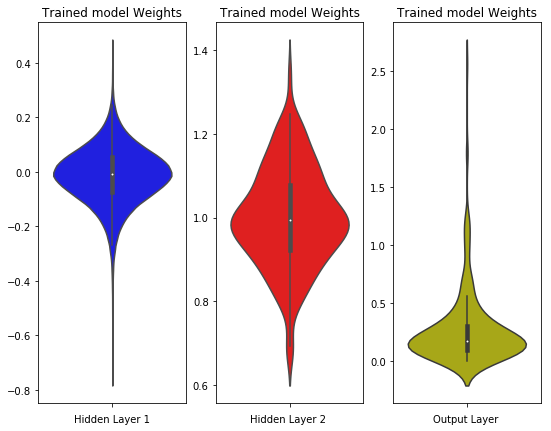

In [ ]:
w_after = model_relu.get_weights()

h1_w = w_after[0].flatten().reshape(-1,1)
h2_w = w_after[2].flatten().reshape(-1,1)
out_w = w_after[4].flatten().reshape(-1,1)


fig = plt.figure(figsize =(9, 7))
plt.title("Weight matrices after model trained")
plt.subplot(1, 3, 1)
plt.title("Trained model Weights")
ax = sns.violinplot(y=h1_w,color='b')
plt.xlabel('Hidden Layer 1')

plt.subplot(1, 3, 2)
plt.title("Trained model Weights")
ax = sns.violinplot(y=h2_w, color='r')
plt.xlabel('Hidden Layer 2 ')

plt.subplot(1, 3, 3)
plt.title("Trained model Weights")
ax = sns.violinplot(y=out_w,color='y')
plt.xlabel('Output Layer ')
plt.show()

In [ ]:
#### Observation:
    From above plot we can see that almost weights of all the layer are following Gaussian curves.

### Model2 Input(784)-ReLu(512)-ReLu(256)-ReLu(64)-Softmax(output)

In [ ]:
warnings.filterwarnings('ignore')
model_relu = Sequential()
model_relu.add(Dense(512, activation='relu', input_shape=(input_dim,), kernel_initializer=RandomNormal(mean=0.0, stddev=0.062, seed=None)))
model_relu.add(BatchNormalization())
model_relu.add(Dropout(0.5))
model_relu.add(Dense(256, activation='relu', kernel_initializer=RandomNormal(mean=0.0, stddev=0.125, seed=None)) )
model_relu.add(BatchNormalization())
model_relu.add(Dropout(0.5))
model_relu.add(Dense(64, activation='relu', kernel_initializer=RandomNormal(mean=0.0, stddev=0.125, seed=None)) )
model_relu.add(BatchNormalization())
model_relu.add(Dropout(0.5))
model_relu.add(Dense(output_dim, activation='softmax'))

model_relu.summary()

Model: "sequential_3"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_7 (Dense)              (None, 512)               401920    
_________________________________________________________________
batch_normalization_5 (Batch (None, 512)               2048      
_________________________________________________________________
dropout_5 (Dropout)          (None, 512)               0         
_________________________________________________________________
dense_8 (Dense)              (None, 256)               131328    
_________________________________________________________________
batch_normalization_6 (Batch (None, 256)               1024      
_________________________________________________________________
dropout_6 (Dropout)          (None, 256)               0         
_________________________________________________________________
dense_9 (Dense)              (None, 64)               

In [ ]:
model_relu.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

history = model_relu.fit(X_train, Y_train, batch_size=batch_size, epochs=nb_epoch, verbose=1, validation_data=(X_test, Y_test))

Train on 60000 samples, validate on 10000 samples
Epoch 1/20
60000/60000 [==============================] - 11s 180us/step - loss: 0.7338 - acc: 0.7762 - val_loss: 0.1834 - val_acc: 0.9410
Epoch 2/20
60000/60000 [==============================] - 10s 161us/step - loss: 0.3022 - acc: 0.9133 - val_loss: 0.1298 - val_acc: 0.9600
Epoch 3/20
60000/60000 [==============================] - 10s 162us/step - loss: 0.2272 - acc: 0.9354 - val_loss: 0.1081 - val_acc: 0.9666
Epoch 4/20
60000/60000 [==============================] - 10s 162us/step - loss: 0.1896 - acc: 0.9460 - val_loss: 0.1019 - val_acc: 0.9689
Epoch 5/20
60000/60000 [==============================] - 10s 161us/step - loss: 0.1681 - acc: 0.9516 - val_loss: 0.0880 - val_acc: 0.9734
Epoch 6/20
60000/60000 [==============================] - 10s 162us/step - loss: 0.1521 - acc: 0.9575 - val_loss: 0.0875 - val_acc: 0.9747
Epoch 7/20
60000/60000 [==============================] - 10s 161us/step - loss: 0.1362 - acc: 0.9606 - val_loss: 0.

Test score: 0.059544409714001816
Test accuracy: 0.9833


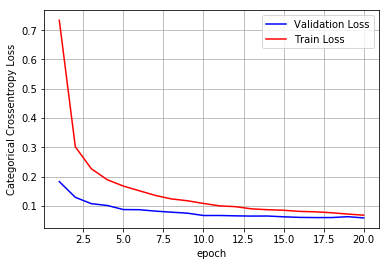

In [ ]:
score = model_relu.evaluate(X_test, Y_test, verbose=0) 
print('Test score:', score[0]) 
print('Test accuracy:', score[1])

fig,ax = plt.subplots(1,1)
ax.set_xlabel('epoch') ; ax.set_ylabel('Categorical Crossentropy Loss')

# list of epoch numbers
x = list(range(1,nb_epoch+1))

vy = history.history['val_loss']
ty = history.history['loss']
plt_dynamic(x, vy, ty, ax)

#### Observation:
    From above plot we can see that train and test data loss are getting converged.

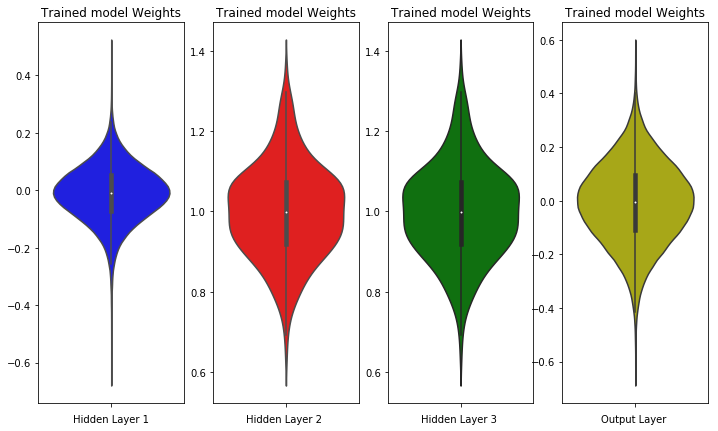

In [ ]:
w_after = model_relu.get_weights()

h1_w = w_after[0].flatten().reshape(-1,1)
h2_w = w_after[2].flatten().reshape(-1,1)
h3_w = w_after[4].flatten().reshape(-1,1)
out_w = w_after[6].flatten().reshape(-1,1)


fig = plt.figure(figsize =(12, 7))
plt.title("Weight matrices after model trained")
plt.subplot(1, 4, 1)
plt.title("Trained model Weights")
ax = sns.violinplot(y=h1_w,color='b')
plt.xlabel('Hidden Layer 1')

plt.subplot(1, 4, 2)
plt.title("Trained model Weights")
ax = sns.violinplot(y=h2_w, color='r')
plt.xlabel('Hidden Layer 2 ')

plt.subplot(1, 4, 3)
plt.title("Trained model Weights")
ax = sns.violinplot(y=h2_w, color='g')
plt.xlabel('Hidden Layer 3 ')

plt.subplot(1, 4, 4)
plt.title("Trained model Weights")
ax = sns.violinplot(y=out_w,color='y')
plt.xlabel('Output Layer ')


plt.show()

#### Observation:
    From above plot we can see that almost weights of all the layer are following Gaussian curves.

In [ ]:
### Model3 Input(784)-ReLu(512)-ReLu(256)-ReLu(128)-ReLu(64)-ReLu(32)-Softmax(output)

In [ ]:
warnings.filterwarnings('ignore')
model_relu = Sequential()
model_relu.add(Dense(512, activation='relu', input_shape=(input_dim,), kernel_initializer=RandomNormal(mean=0.0, stddev=0.062, seed=None)))
model_relu.add(BatchNormalization())
model_relu.add(Dropout(0.5))
model_relu.add(Dense(256, activation='relu', kernel_initializer=RandomNormal(mean=0.0, stddev=0.125, seed=None)) )
model_relu.add(BatchNormalization())
model_relu.add(Dropout(0.5))
model_relu.add(Dense(128, activation='relu', kernel_initializer=RandomNormal(mean=0.0, stddev=0.125, seed=None)) )
model_relu.add(BatchNormalization())
model_relu.add(Dropout(0.5))
model_relu.add(Dense(64, activation='relu', kernel_initializer=RandomNormal(mean=0.0, stddev=0.125, seed=None)) )
model_relu.add(BatchNormalization())
model_relu.add(Dropout(0.5))
model_relu.add(Dense(32, activation='relu', kernel_initializer=RandomNormal(mean=0.0, stddev=0.125, seed=None)) )
model_relu.add(BatchNormalization())
model_relu.add(Dropout(0.5))
model_relu.add(Dense(output_dim, activation='softmax'))
model_relu.summary()

Model: "sequential_4"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_11 (Dense)             (None, 512)               401920    
_________________________________________________________________
batch_normalization_8 (Batch (None, 512)               2048      
_________________________________________________________________
dropout_8 (Dropout)          (None, 512)               0         
_________________________________________________________________
dense_12 (Dense)             (None, 256)               131328    
_________________________________________________________________
batch_normalization_9 (Batch (None, 256)               1024      
_________________________________________________________________
dropout_9 (Dropout)          (None, 256)               0         
_________________________________________________________________
dense_13 (Dense)             (None, 128)              

In [ ]:
model_relu.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

history = model_relu.fit(X_train, Y_train, batch_size=batch_size, epochs=nb_epoch, verbose=1, validation_data=(X_test, Y_test))

Train on 60000 samples, validate on 10000 samples
Epoch 1/20
60000/60000 [==============================] - 13s 212us/step - loss: 1.6175 - acc: 0.4625 - val_loss: 0.4250 - val_acc: 0.8909
Epoch 2/20
60000/60000 [==============================] - 11s 177us/step - loss: 0.6733 - acc: 0.7973 - val_loss: 0.2359 - val_acc: 0.9365
Epoch 3/20
60000/60000 [==============================] - 11s 179us/step - loss: 0.4579 - acc: 0.8778 - val_loss: 0.1798 - val_acc: 0.9507
Epoch 4/20
60000/60000 [==============================] - 11s 181us/step - loss: 0.3661 - acc: 0.9065 - val_loss: 0.1674 - val_acc: 0.9547
Epoch 5/20
60000/60000 [==============================] - 11s 178us/step - loss: 0.3102 - acc: 0.9237 - val_loss: 0.1390 - val_acc: 0.9629
Epoch 6/20
60000/60000 [==============================] - 11s 178us/step - loss: 0.2698 - acc: 0.9352 - val_loss: 0.1331 - val_acc: 0.9662
Epoch 7/20
60000/60000 [==============================] - 11s 178us/step - loss: 0.2483 - acc: 0.9413 - val_loss: 0.

Test score: 0.07798593473616056
Test accuracy: 0.9816


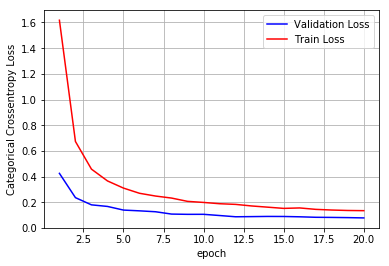

In [ ]:
score = model_relu.evaluate(X_test, Y_test, verbose=0) 
print('Test score:', score[0]) 
print('Test accuracy:', score[1])

fig,ax = plt.subplots(1,1)
ax.set_xlabel('epoch') ; ax.set_ylabel('Categorical Crossentropy Loss')

# list of epoch numbers
x = list(range(1,nb_epoch+1))

vy = history.history['val_loss']
ty = history.history['loss']
plt_dynamic(x, vy, ty, ax)

#### Observation:
    From above plot we can see that train and test data loss are getting converged.

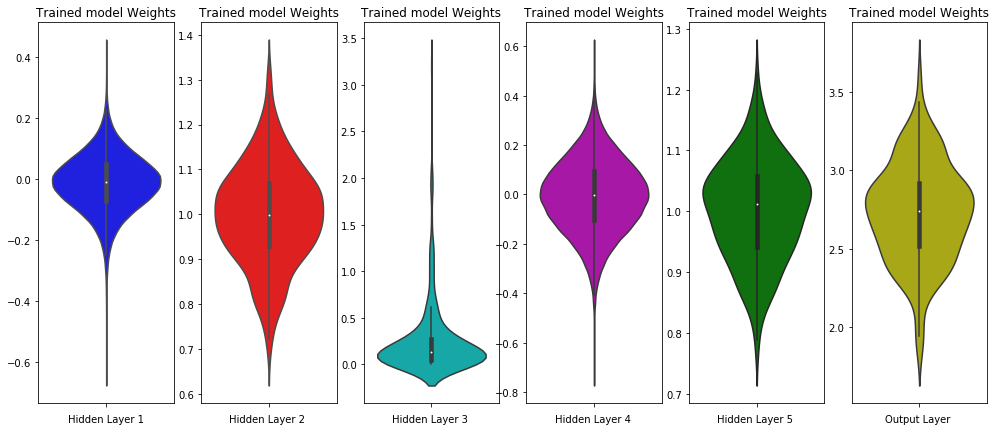

In [ ]:
w_after = model_relu.get_weights()

h1_w = w_after[0].flatten().reshape(-1,1)
h2_w = w_after[2].flatten().reshape(-1,1)
h3_w = w_after[4].flatten().reshape(-1,1)
h4_w = w_after[6].flatten().reshape(-1,1)
h5_w = w_after[8].flatten().reshape(-1,1)
out_w = w_after[10].flatten().reshape(-1,1)


fig = plt.figure(figsize =(17, 7))
plt.title("Weight matrices after model trained")
plt.subplot(1, 6, 1)
plt.title("Trained model Weights")
ax = sns.violinplot(y=h1_w,color='b')
plt.xlabel('Hidden Layer 1')

plt.subplot(1, 6, 2)
plt.title("Trained model Weights")
ax = sns.violinplot(y=h2_w, color='r')
plt.xlabel('Hidden Layer 2 ')

plt.subplot(1, 6, 3)
plt.title("Trained model Weights")
ax = sns.violinplot(y=h3_w,color='c')
plt.xlabel('Hidden Layer 3 ')

plt.subplot(1, 6, 4)
plt.title("Trained model Weights")
ax = sns.violinplot(y=h4_w,color='m')
plt.xlabel('Hidden Layer 4 ')

plt.subplot(1, 6, 5)
plt.title("Trained model Weights")
ax = sns.violinplot(y=h5_w,color='g')
plt.xlabel('Hidden Layer 5 ')

plt.subplot(1, 6, 6)
plt.title("Trained model Weights")
ax = sns.violinplot(y=out_w,color='y')
plt.xlabel('Output Layer ')


plt.show()

#### Observation:
    From above plot we can see that almost weights of all the layer are following Gaussian curves.

In [ ]:
from prettytable import PrettyTable
    
x = PrettyTable()

x.field_names = ["Model", "Total Params ","Test score", "Test Accuracy"]

x.add_row(["Model1(780x 256 x 64 x 10)", '219,338',0.0680, 0.98])
x.add_row(["Model2(780x 512 x 256 x 64 x 10)",'553,674', 0.0595, .98])
x.add_row(["Model3(780x 512 x 256 x 128 x 64 x 32 x 10)", '580,778',0.0779, 0.98])

print(x)

+---------------------------------------------+---------------+------------+---------------+
|                    Model                    | Total Params  | Test score | Test Accuracy |
+---------------------------------------------+---------------+------------+---------------+
|          Model1(780x 256 x 64 x 10)         |    219,338    |   0.068    |      0.98     |
|       Model2(780x 512 x 256 x 64 x 10)      |    553,674    |   0.0595   |      0.98     |
| Model3(780x 512 x 256 x 128 x 64 x 32 x 10) |    580,778    |   0.0779   |      0.98     |
+---------------------------------------------+---------------+------------+---------------+


In [ ]:
### Conclusion:

In [ ]:
* Accuracy of all the Models are almost same.
* From Violin plot, we can see that almost weights of all the layer are following Gaussian curves.
* From Categorical Crossentropy Loss vs Epoch, we can see that train and test data loss are getting converged.